In [1]:
#importing required libraries
import time
import numpy as np
import pandas as pd
from sklearn import metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


In [4]:
#read the csv file
data = pd.read_csv("SWIPES.csv")

X = data.drop(["subject"],axis =1)
y = data["subject"]
data.shape

(22400, 31)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17920, 30), (17920,), (4480, 30), (4480,))

In [5]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=100)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [8]:
#Results of feature importance with RF sorted in list

from sklearn.metrics import confusion_matrix

feature_imp = pd.Series(forest.feature_importances_,index=data.columns[0:30]).sort_values(ascending=False)
print(feature_imp)
###############################

swipetype             0.100245
directional stroke    0.061121
tottime               0.054579
dlist                 0.047240
aquarts_1             0.045952
vquarts_0             0.042983
astd                  0.040094
pquarts_1             0.038804
vquarts_1             0.038508
vmean                 0.038146
amean                 0.036425
vquarts_2             0.036289
aquarts_0             0.036123
vstd                  0.033372
maxy                  0.031834
areamean              0.031125
tanangle              0.029485
pstd                  0.025757
areaquarts_0          0.025142
minx                  0.023304
areaquarts_2          0.022924
pquarts_0             0.022869
miny                  0.021210
maxx                  0.020791
pmean                 0.019685
pquarts_2             0.019463
eucliddist            0.018557
areastd               0.013818
areaquarts_1          0.013068
aquarts_2             0.011089
dtype: float64


In [9]:
#persona corrlation
from sklearn.model_selection import train_test_split

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any further insight.

def correlation(dataset, threshold):
    
    # create a set where I will store the names of correlated columns
    col_corr = set()
    
    # create the correlation matrix
    corr_matrix = dataset.corr()
    
    # for each feature in the dataset (columns of the correlation matrix)
    for i in range(len(corr_matrix.columns)):
        
        # check with other features
        for j in range(i):
            
            # if the correlation is higher than a certain threshold
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                
                # print correlation, and variables examined
                # keep in mind that the columns and rows of the dataframe are identical
                # so we can identify the features being examned by looking for i,j
                # in the column names
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                
                # get the name of the correlated feature
                colname = corr_matrix.columns[j]
                
                # and add it to our correlated set
                col_corr.add(colname)
                
    return col_corr

In [10]:
#Rsult of persona Corr
#select any two features corrlated 20% or more
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

0.8969265958024408 amean vmean
0.9457316538489677 aquarts_0 vstd


2

In [6]:
#Mutual information
# best 21 feature
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile


In [7]:
mi = mutual_info_classif(X_train, y_train)

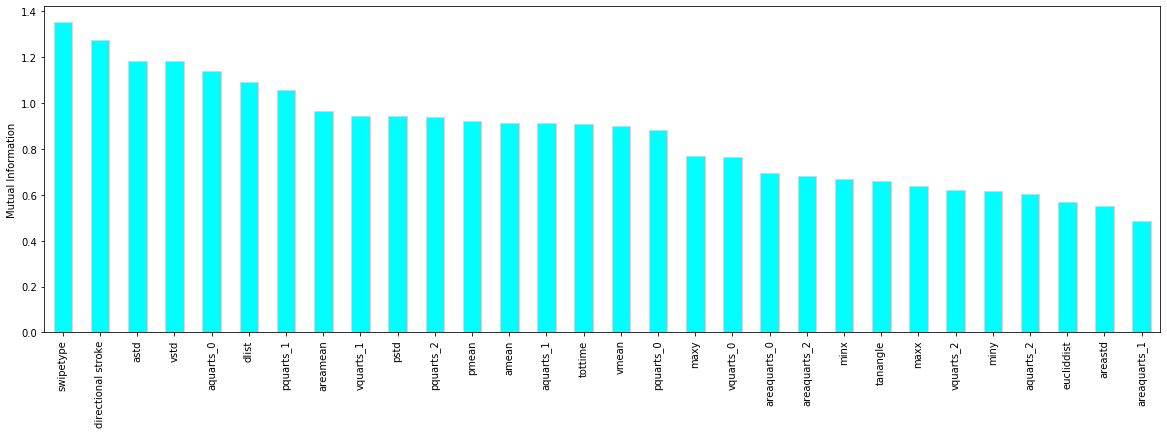

In [22]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6),  color='cyan',edgecolor='pink')
plt.ylabel('Mutual Information')
plt.savefig('fi.png',bbox_inches='tight')

In [15]:
# here we will select the top 10 features
# based on their mutual information value

# select features
sel_ = SelectKBest(mutual_info_classif, k=17).fit(X_train, y_train)

# display features
X_train.columns[sel_.get_support()]

Index(['dlist', 'tottime', 'vmean', 'vstd', 'vquarts_1', 'amean', 'astd',
       'aquarts_0', 'aquarts_1', 'pmean', 'pstd', 'pquarts_0', 'pquarts_1',
       'pquarts_2', 'areamean', 'swipetype', 'directional stroke'],
      dtype='object')

In [67]:
# Creating holders to store the model performance results
Sel__Clf = []
accuracy = []
EER = []
Time = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,e,l,b,c,d):
  Sel__Clf.append(model)
  accuracy.append(round(a, 3))
  EER.append(e)
  Time.append(l)
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [68]:
data = pd.read_csv("SWIPES.csv")

In [69]:
#drop features after using feture importance
#from 30 to 23 feature

data=data.drop(["pmean"],axis =1)
data=data.drop(["pquarts_2"],axis =1)
data=data.drop(["maxx"],axis =1)
data=data.drop(["eucliddist"],axis =1)
data=data.drop(["areastd"],axis =1)
data=data.drop(["areaquarts_1"],axis =1)
data=data.drop(["aquarts_2"],axis =1)
"""
pmean                 0.020473
pquarts_2             0.019653
maxx                  0.019644
eucliddist            0.019259
areastd               0.013834
areaquarts_1          0.013732
aquarts_2             0.011585
"""

'\npmean                 0.020473\npquarts_2             0.019653\nmaxx                  0.019644\neucliddist            0.019259\nareastd               0.013834\nareaquarts_1          0.013732\naquarts_2             0.011585\n'

In [70]:
X = data.drop(["subject"],axis =1)
y = data["subject"]
data.shape

(22400, 24)

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17920, 23), (17920,), (4480, 23), (4480,))

In [72]:
data.shape

(22400, 24)

In [73]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=150)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
#predicting the target value from the model for the samples
import time
y_train_forest = forest.predict(X_train)
start_time= time.time() 
y_test_forest = forest.predict(X_test)
time= time.time() - start_time 

In [75]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: ",acc_train_forest)
print("Random Forest : Accuracy on test Data: ",acc_test_forest)
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest, average='macro')
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest, average='macro')
print("Random Forest : f1_score on training Data: ",f1_score_train_forest)
print("Random Forest : f1_score on test Data: ",f1_score_test_forest)
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest, average='macro')
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest, average='macro')
print("Random Forest : Recall on training Data: ",recall_score_train_forest)
print("Random Forest : Recall on test Data: ",recall_score_test_forest)
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest, average='macro')
precision_score_test_forest = metrics.precision_score(y_test,y_test_forest, average='macro')
print("Random Forest : precision on training Data: ",precision_score_train_forest)
print("Random Forest : precision on test Data: ",precision_score_test_forest)

EER_forest ="{:.4f}".format(mean_squared_error(y_test, y_test_forest))

Random Forest : Accuracy on training Data:  1.0
Random Forest : Accuracy on test Data:  0.9966517857142857

Random Forest : f1_score on training Data:  1.0
Random Forest : f1_score on test Data:  0.9965301933526173

Random Forest : Recall on training Data:  1.0
Random Forest : Recall on test Data:  0.9965524372299586

Random Forest : precision on training Data:  1.0
Random Forest : precision on test Data:  0.9965536845252687


In [76]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('RF_FI',acc_test_forest,EER_forest,time,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

In [77]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [78]:
#predicting the target value from the model for the samples
import time
y_train_knn = knn.predict(X_train)
start_time= time.time()
y_test_knn = knn.predict(X_test)
time= time.time() - start_time 

In [79]:
#computing the accuracy,f1_score,Recall,precision of the model performance
acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn, average='macro')
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn, average='macro')

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn, average='macro')
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn, average='macro')

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn, average='macro')
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn, average='macro')

EER_knn ="{:.4f}".format(mean_squared_error(y_test, y_test_knn))

In [80]:
storeResults('knn_FI',acc_test_knn,EER_knn,time,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

In [81]:
#condigrations for RF with feature importance
#read the csv file
data = pd.read_csv("SWIPES.csv")
#drop features after using persona corrlation
#from 30 to 27 feauter
data=data.drop(["vmean"],axis =1)
data=data.drop(["vstd"],axis =1)
data=data.drop(["amean"],axis =1)
data=data.drop(["aquarts_0"],axis =1)
data.shape

"""
corrlated features
0.9177758017753822 amean vmean
0.9383712958815513 aquarts_0 vstd
"""

'\ncorrlated features\n0.9177758017753822 amean vmean\n0.9383712958815513 aquarts_0 vstd\n'

In [82]:
X = data.drop(["subject"],axis =1)
y = data["subject"]
data.shape
data.columns

Index(['minx', 'miny', 'maxx', 'maxy', 'eucliddist', 'dlist', 'tanangle',
       'tottime', 'vquarts_0', 'vquarts_1', 'vquarts_2', 'astd', 'aquarts_1',
       'aquarts_2', 'pmean', 'pstd', 'pquarts_0', 'pquarts_1', 'pquarts_2',
       'areamean', 'areastd', 'areaquarts_0', 'areaquarts_1', 'areaquarts_2',
       'swipetype', 'directional stroke', 'subject'],
      dtype='object')

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17920, 26), (17920,), (4480, 26), (4480,))

In [84]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=150)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
#predicting the target value from the model for the samples
import time
y_train_forest = forest.predict(X_train)
start_time= time.time() 
y_test_forest = forest.predict(X_test)
time= time.time() - start_time 

In [86]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: ",acc_train_forest)
print("Random Forest : Accuracy on test Data: ",acc_test_forest)
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest, average='macro')
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest, average='macro')
print("Random Forest : f1_score on training Data: ",f1_score_train_forest)
print("Random Forest : f1_score on test Data: ",f1_score_test_forest)
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest, average='macro')
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest, average='macro')
print("Random Forest : Recall on training Data: ",recall_score_train_forest)
print("Random Forest : Recall on test Data: ",recall_score_test_forest)
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest, average='macro')
precision_score_test_forest = metrics.precision_score(y_test,y_test_forest, average='macro')
print("Random Forest : precision on training Data: ",precision_score_train_forest)
print("Random Forest : precision on test Data: ",precision_score_test_forest)

EER_forest ="{:.4f}".format(mean_squared_error(y_test, y_test_forest))

Random Forest : Accuracy on training Data:  1.0
Random Forest : Accuracy on test Data:  0.9959821428571428

Random Forest : f1_score on training Data:  1.0
Random Forest : f1_score on test Data:  0.996031526901062

Random Forest : Recall on training Data:  1.0
Random Forest : Recall on test Data:  0.9959873953329001

Random Forest : precision on training Data:  1.0
Random Forest : precision on test Data:  0.9961168258393559


In [87]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('RF_Corr',acc_test_forest,EER_forest,time,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

In [88]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [89]:
#predicting the target value from the model for the samples
import time
y_train_knn = knn.predict(X_train)
start_time= time.time()
y_test_knn = knn.predict(X_test)
time= time.time() - start_time 

In [90]:
#computing the accuracy,f1_score,Recall,precision of the model performance
acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn, average='macro')
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn, average='macro')

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn, average='macro')
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn, average='macro')

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn, average='macro')
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn, average='macro')

EER_knn ="{:.4f}".format(mean_squared_error(y_test, y_test_knn))

In [91]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Knn_Corr',acc_test_knn,EER_knn,time,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

In [92]:
data = pd.read_csv("SWIPES.csv")

# to remove the rest of the features:
    
data=data.drop(["minx"],axis =1)
data=data.drop(["miny"],axis =1)
data=data.drop(["maxx"],axis =1)
data=data.drop(["eucliddist"],axis =1)
data=data.drop(["tanangle"],axis =1)

data=data.drop(["vquarts_2"],axis =1)
data=data.drop(["aquarts_2"],axis =1)

data=data.drop(["areastd"],axis =1)
data=data.drop(["areaquarts_0"],axis =1)
data=data.drop(["areaquarts_1"],axis =1)
data=data.drop(["areaquarts_2"],axis =1)

data.shape


(22400, 20)

In [93]:
X = data.drop(["subject"],axis =1)
y = data["subject"]
data.shape

(22400, 20)

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17920, 19), (17920,), (4480, 19), (4480,))

In [95]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=150)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
#predicting the target value from the model for the samples
import time
y_train_forest = forest.predict(X_train)
start_time= time.time() 
y_test_forest = forest.predict(X_test)
time= time.time() - start_time 

In [97]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: ",acc_train_forest)
print("Random Forest : Accuracy on test Data: ",acc_test_forest)
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest, average='macro')
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest, average='macro')
print("Random Forest : f1_score on training Data: ",f1_score_train_forest)
print("Random Forest : f1_score on test Data: ",f1_score_test_forest)
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest, average='macro')
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest, average='macro')
print("Random Forest : Recall on training Data: ",recall_score_train_forest)
print("Random Forest : Recall on test Data: ",recall_score_test_forest)
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest, average='macro')
precision_score_test_forest = metrics.precision_score(y_test,y_test_forest, average='macro')
print("Random Forest : precision on training Data: ",precision_score_train_forest)
print("Random Forest : precision on test Data: ",precision_score_test_forest)

EER_forest ="{:.4f}".format(mean_squared_error(y_test, y_test_forest))

Random Forest : Accuracy on training Data:  1.0
Random Forest : Accuracy on test Data:  0.9904017857142857

Random Forest : f1_score on training Data:  1.0
Random Forest : f1_score on test Data:  0.9904586592754718

Random Forest : Recall on training Data:  1.0
Random Forest : Recall on test Data:  0.9904511226428916

Random Forest : precision on training Data:  1.0
Random Forest : precision on test Data:  0.990626034304386


In [98]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('RF_MI',acc_test_forest,EER_forest,time,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

In [99]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [100]:
#predicting the target value from the model for the samples
import time
y_train_knn = knn.predict(X_train)
start_time= time.time()
y_test_knn = knn.predict(X_test)
time= time.time() - start_time 

In [101]:
#computing the accuracy,f1_score,Recall,precision of the model performance
acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn, average='macro')
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn, average='macro')

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn, average='macro')
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn, average='macro')

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn, average='macro')
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn, average='macro')

EER_knn ="{:.4f}".format(mean_squared_error(y_test, y_test_knn))

In [102]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Knn_MI',acc_test_knn,EER_knn,time,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

In [103]:
#creating dataframe
result = pd.DataFrame({ 'Sel__Clf' : Sel__Clf,
                        'Accuracy' : accuracy,
                        'EER'      : EER,
                        'Time'     : Time,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [104]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)


In [105]:
# dispalying total result
sorted_result

,Sel__Clf,Accuracy,EER,Time,f1_score,Recall,Precision
0,RF_FI,0.997,1.5828,0.694351,0.997,1.000,1.000
1,RF_Corr,0.996,2.5627,1.167694,0.996,1.000,1.000
2,RF_MI,0.990,4.3520,0.533815,0.990,1.000,1.000
3,Knn_Corr,0.988,7.1877,5.853674,0.988,0.997,0.997
4,knn_FI,0.981,9.3607,4.472111,0.980,0.993,0.993
5,Knn_MI,0.966,16.5904,2.251314,0.966,0.988,0.988
